<a href="https://colab.research.google.com/github/bhattronak1/ML-Tensorflow-project/blob/main/Copy_of_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (4.2.0)


In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import math
import matplotlib.pyplot as plt


In [ ]:
import logging
logger= tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
dataset, metadata= tfds.load('fashion_mnist', as_supervised= True, with_info= True)
train_data, test_data= dataset['train'], dataset['test']

In [ ]:
class_names= metadata.features['label'].names
print('Class Names: {}'. format(class_names))

Class Names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples= metadata.splits['train'].num_examples
num_test_examples= metadata.splits['test'].num_examples
print('Number of train examples: {}'.format(num_train_examples))
print('Number of test examples: {}'. format(num_test_examples))

Number of train examples: 60000
Number of test examples: 10000


In [ ]:
def normalize(images,labels):
  images= tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_data= train_data.map(normalize)
test_data=test_data.map(normalize)

train_data= train_data.cache()
test_data= test_data.cache()


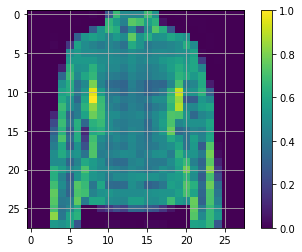

In [ ]:
for images, label in test_data.take(1):
  break

images = images.numpy().reshape((28,28))

plt.figure()
plt.imshow(images)
plt.colorbar()
plt.grid(True)
plt.show()

In [ ]:
model= tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28,1)),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(10, activation= tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE=32
train_data=train_data.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_data=test_data.cache().batch(BATCH_SIZE)

In [ ]:
model.fit(train_data, epochs=5, steps_per_epoch=math.ceil(num_train_examples/32))

Epoch 1/5
1875/1875 [==============================] - 9s 2ms/step - loss: 0.6321 - accuracy: 0.7822
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3971 - accuracy: 0.8576
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3456 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3255 - accuracy: 0.8820
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3064 - accuracy: 0.8883


In [ ]:
test_loss, test_accuracy= model.evaluate(test_data, steps= math.ceil(num_test_examples/32))
print('Accuracy on test data= {}'.format(test_accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.3717 - accuracy: 0.8709
Accuracy on test data= 0.8708999752998352


In [ ]:
for test_images, test_labels in test_data.take(1):

  test_images= test_images.numpy()
  test_labels= test_labels.numpy()
  prediction= model.predict(test_images)

In [ ]:
prediction.shape

(32, 10)

In [ ]:
prediction[0]

array([2.8201370e-05, 2.4835210e-06, 8.3961654e-03, 1.5618710e-06,
       9.5991939e-01, 1.9302504e-10, 3.1644933e-02, 4.7327303e-10,
       7.2750327e-06, 9.7150621e-10], dtype=float32)

In [ ]:
np.argmax(prediction[0])

4

In [ ]:
test_labels[0]

4